# Fundamentals of Machine Learning (CSCI-UA.473)

## Homework 2
### Due: October 26th, 2023 at 11:59PM

### Name: Pinzhi Huang
### Email: ph2239@nyu.edu

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Use the same dataset that was released with HW1
data = pd.read_csv('/Users/eddiehanqz/Desktop/FML2023_HW1_Dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Question 1: Maximum Likelihood Estimation (MLE) vs Maximum A Posteriori (MAP) (25 points)

In Homework 1, we performed linear and ridge regression. To summarize:

In Linear regression,

$$\beta = \arg\min_{\beta}\sum\left(y_i - \left(\beta_0 + \beta_1 x_{1i} +, \ldots, + \beta_px_{p i}\right)\right)^2$$


* $J(\beta)$ is the cost function.
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{1i}$ represents the values of the feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

For ridge regression

$$J(\beta) = \sum\left(y_i - \left(\beta_0 + \beta_1 x_{1i} +, \ldots, + \beta_px_{p i}\right)\right)^2 + \lambda \cdot \sum \beta_i^2$$

* $\lambda$ is the regularization hyper-parameter.

**Task 1.1 (5 points)** Linear regression embodies Maximum Likelihood Estimation (MLE). Show that a closed form expression is $$\beta = (\mathbf{A}^\top \mathbf{A})^{-1}\mathbf{A}^\top \mathbf{Y}$$ where $\mathbf{A} = [X_1,\ldots,X_n]$ and $\mathbf{Y} = [Y_1,\ldots,Y_n]$.

**Task 1.2 (5 points)**: Ridge regression embodies Maximum A Posteriori (MAP), wherein the regularizer serves as the prior. Show that a closed form expression for the ridge estimator is $$\beta = (\mathbf{A}^\top \mathbf{A} + \lambda I)^{-1}\mathbf{A}^\top \mathbf{Y}$$ where $\mathbf{A} = [X_1,\ldots,X_n]$ and $\mathbf{Y} = [Y_1,\ldots,Y_n]$.

**Task 1.3 Implementation (10 points):** Fill in the code below to differentiate between MLE and MAP.

**Task 1.4 (5 points):**
* Do MLE and MAP yield distinct solutions as the sample size tends to infinity? Explain your answer.

* Will the impact of prior be greater with a small or large sample size, and what is the underlying rationale for this phenomenon?



## Anwser for Task 1

#### Task1.1 Anwser
Take the derivative of the cost function with respect to β

$$
\begin{align}
\frac{\partial J(\beta)}{\partial \beta} =& \frac{\partial}{\partial \beta} \sum (Y_i - \beta^T X_i)^2 \\
=& -2 \sum (Y_i - \beta^T X_i) X_i 
\end{align}
$$

To find the value of $\beta$ that minimizes the SSE, we set the derivative to zero and solve for $\beta$, where we get:
$$
-2 \sum (x_i - \beta^T x_i) x_i =0 \\
-2(Y - \beta^T A)A = 0
$$

Therefore, we have:
$$
\mathbf{A}^\top \mathbf{A} \beta = \mathbf{A}^\top \mathbf{Y} \\ 
\beta = (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top \mathbf{Y}
$$


#### Task1.2 Anwser
To minimize $J(\beta)$, we'll differentiate it with respect to $\beta$ and set the result to zero.
$$
\begin{align}
\frac{\partial J(\beta)}{\partial \beta} =& \frac{\partial}{\partial \beta} (\sum\left(y_i - \left(\beta_0 + \beta_1 x_{1i} +, \ldots, + \beta_px_{p i}\right)\right)^2 + \lambda \cdot \sum \beta_i^2)\\
=& -2 \sum((y_i - \beta_i^T x_i)x_i -  \lambda \beta_i)
\end{align}
$$

Setting it to zero, we have, 
$$
\begin{align}
-2 \sum((y_i - \beta_i^T x_i)x_i - \lambda \beta_i) =& 0  \\ 
(Y - \beta A)A^T - \lambda \beta =& 0 \\
(\mathbf{A}^\top \mathbf{A} + \lambda I) \beta =& \mathbf{A}^\top \mathbf{Y} \\
\beta =& (\mathbf{A}^\top \mathbf{A} + \lambda I)^{-1}\mathbf{A}^\top \mathbf{Y}
\end{align}
$$



#### Task 1.3 Anwser

In [72]:
def mle_linear_regression(X, y):
    # Compute the MLE estimates using closed-form solution (HINT: Use np.linalg.inv)
    
    # Compute the MLE estimates using closed-form solution
    theta_mle = np.matmul(np.linalg.inv(X.T@X), X.T@y)

    return theta_mle

# Calculate MLE estimates with bias
theta_mle = mle_linear_regression(X_train, y_train)

# Make predictions on the test set
y_preds = X_test @ theta_mle

# Calculate Mean Squared Error (MSE)
mse_mle = np.mean((y_test - y_preds)**2)
print(f"MSE using MLE: {mse_mle}")

MSE using MLE: 27961.75691676191


In [73]:
def map_linear_regression(X, y, lambda_reg):
    theta_map = np.matmul(np.linalg.inv(X.T@X+lambda_reg*np.eye(X.shape[1])), X.T@y)
    return theta_map

# Set the regularization parameter (lambda)
lambda_reg = 0.01
theta_map = map_linear_regression(X_train, y_train, lambda_reg)

# Make predictions on the test set
y_preds = X_test @ theta_map

# Calculate Mean Squared Error (MSE)
mse_map = np.mean((y_test - y_preds)**2)
print(f"MSE using MAP: {mse_map}")

MSE using MAP: 27936.540595134647


#### Task 1.4 Anwser:

   1) Do MLE and MAP yield distinct solutions as the sample size tends to infinity?

   As the sample size tends to infinity, the Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimates converge to the same value, under regularity conditions. This is because as the sample size grows, the likelihood dominates the prior in the MAP estimation. The influence of the prior becomes negligible compared to the overwhelming amount of data. Therefore, in the limit of infinite data, the MAP estimate becomes equivalent to the MLE estimate.





   2) Will the impact of the prior be greater with a small or large sample size, and what is the underlying rationale for this phenomenon?

   The impact of the prior is greater with a small sample size. When the sample size is small, there's less data to "inform" or "sway" the estimation, so the prior (our initial beliefs or assumptions) plays a more significant role in the MAP estimate. As the sample size increases, the likelihood (which is informed by the data) starts to dominate, and the influence of the prior diminishes.

   The underlying rationale for this phenomenon is that the likelihood represents the information from the data, while the prior represents our initial beliefs or assumptions. When we have little data, our estimates rely more on our initial beliefs. As we gather more data, our estimates are increasingly influenced by the data itself, and the initial beliefs (prior) become less relevant. This is a manifestation of the Bayesian updating process, where prior beliefs are updated with new data to produce posterior beliefs.

### Question 2: Classification with imbalanced dataset (20 points)

We are creating an imbalanced version of the target variable for the Z dataset. An imbalanced dataset means that one class is much more frequent than the other class. In our case, we will consider the two classes as follows:

- Class 0: Z progression values that are below the 75th percentile of the original target variable.
- Class 1: Z progression values that are above the 75th percentile of the original target variable.

By doing this, we are creating an imbalance where Class 0 will be more prevalent than Class 1, mimicking a common scenario in real-world imbalanced datasets.

In [74]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Create an imbalanced target variable
y_imbalanced = np.where(y > np.percentile(y, 75), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced, test_size=0.2, random_state=42)


**Task 2.1 (3 points):**
- Create a SVM classifier with a linear kernel, then calculate accuracy, precision, recall, and F1 score using available library functions.

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("test class")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\n")

print("train class")
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, zero_division=0)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


test class
Accuracy: 0.8427
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


train class
Accuracy: 0.7252
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000



**Task 2.2 (5 points):** What causes the metrics to exhibit lower values for the imbalanced dataset compared to those in homework 1?

### Task2.2 anwser 
The dataset is imbalance. There're too many 0 than 1 in y. Speficially, there are 331's 0 and only 109's 1, making the model that only outputs 0 having an accuracy of 75% already. Put it in other way, due to the scarcity of the 1 class examples, models might overfit to the few available instances. This can lead to poor generalization performance when the model is tested on new, unseen data.


**Random oversampling** is one of the many techniques used to address the class imbalance problem. It involves increasing the number of instances in the minority class by randomly duplicating existing instances. This helps to balance the class distribution and can lead to improved performance for certain models.

**Task 2.3 (2 points):** Calculate and display the following statistics for the target variable (y) before applying random oversampling:
  - Mean
  - Standard Deviation
  - Minimum
  - Maximum

**Task 2.4 (5 points):** Perform random oversampling on the training set. After oversampling, calculate and display the same statistics for the oversampled target variable.

In [76]:
# task2.3
print("for y:")
print(f"Mean is {np.mean(y)}")
print(f"Standard devidation is {np.std(y)}")
print(f"The maximum is {np.max(y)}")
print(f"The minimum is {np.min(y)}")
print("\nfor y_train")
print(f"Mean is {np.mean(y_train)}")
print(f"Standard devidation is {np.std(y_train)}")
print(f"The maximum is {np.max(y_train)}")
print(f"The minimum is {np.min(y_train)}")

#not sure if I should calculate for y or y_train so I do them both

for y:
Mean is 152.13348416289594
Standard devidation is 77.00574586945044
The maximum is 346.0
The minimum is 25.0

for y_train
Mean is 0.2747875354107649
Standard devidation is 0.4464071524893418
The maximum is 1
The minimum is 0


In [77]:
#task2.4
from sklearn.utils import resample

majority_class = (y_train == 0)
minority_class = (y_train == 1)

X_train_majority = X_train[majority_class]
y_train_majority = y_train[majority_class]

X_train_minority = X_train[minority_class]
y_train_minority = y_train[minority_class]


X_train_minority_oversampled, y_train_minority_oversampled = resample(X_train_minority, y_train_minority, 
                                                                     replace=True, 
                                                                     n_samples=len(y_train_majority),
                                                                     random_state=42)

# Combine the oversampled minority class instances with the original majority class instances
X_train_oversampled = np.vstack((X_train_majority, X_train_minority_oversampled))
y_train_oversampled = np.hstack((y_train_majority, y_train_minority_oversampled))


print(f"Mean is {np.mean(y_train_oversampled)}")
print(f"Standard devidation is {np.std(y_train_oversampled)}")
print(f"The maximum is {np.max(y_train_oversampled)}")
print(f"The minimum is {np.min(y_train_oversampled)}")

Mean is 0.5
Standard devidation is 0.5
The maximum is 1
The minimum is 0


**Task 2.5 (5 points):**
- Create another instance of SVM classifier with linear kernel, fit it on the oversampled data and calculate all the prior metrics for the oversampled model.
- Show the metrics with different regularization parameters {0.1, 1, 10, 100} on the linear kernel.
- Show the metrics with polynomial degrees {-1, 0, 3, 4} and observe how the model's complexity changes.
- Introduce different values for the regularization parameter in the RBF kernel and show how it balances the trade-off between maximizing the margin and minimizing classification error.

In [78]:
def display_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


For the new oversampled model
Accuracy=0.7865, Precision=0.4194, Recall=0.9286, F1=0.5778


For different regularization parameters {0.1, 1, 10, 100} on the linear kernel.
For C=0.1: Accuracy=0.7416, Precision=0.3714, Recall=0.9286, F1=0.5306
For C=1: Accuracy=0.7865, Precision=0.4194, Recall=0.9286, F1=0.5778
For C=10: Accuracy=0.7753, Precision=0.3929, Recall=0.7857, F1=0.5238
For C=100: Accuracy=0.7640, Precision=0.3793, Recall=0.7857, F1=0.5116

For polynomial degrees {1, 2, 3, 4} 
For degree=1: Accuracy=0.7640, Precision=0.3793, Recall=0.7857, F1=0.5116
For degree=2: Accuracy=0.7865, Precision=0.3529, Recall=0.4286, F1=0.3871
For degree=3: Accuracy=0.8315, Precision=0.4737, Recall=0.6429, F1=0.5455
For degree=4: Accuracy=0.8315, Precision=0.4444, Recall=0.2857, F1=0.3478


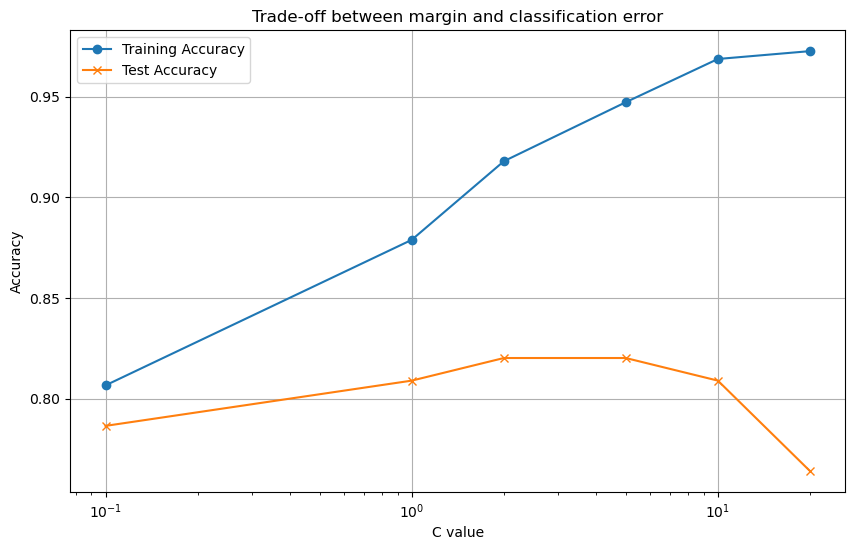

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np


# Convert pandas DataFrame (if you're using one) to numpy arrays: I do not know what I am doing
X_train_oversampled = X_train_oversampled.values if hasattr(X_train_oversampled, 'values') else X_train_oversampled
y_train_oversampled = y_train_oversampled.values if hasattr(y_train_oversampled, 'values') else y_train_oversampled
X_test = X_test.values if hasattr(X_test, 'values') else X_test
y_test = y_test.values if hasattr(y_test, 'values') else y_test


svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_oversampled, y_train_oversampled)
y_pred = svm_classifier.predict(X_test)
accuracy, precision, recall, f1 = display_metrics(y_test, y_pred)
print("For the new oversampled model")
print(f"Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")
print("\n")

print("For different regularization parameters {0.1, 1, 10, 100} on the linear kernel.")
for C in [0.1, 1, 10, 100]:
    svm_clf = SVC(kernel='linear', C=C, random_state=42)
    svm_clf.fit(X_train_oversampled, y_train_oversampled)
    y_pred = svm_clf.predict(X_test)
    accuracy, precision, recall, f1 = display_metrics(y_test, y_pred)
    print(f"For C={C}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")

print("\nFor polynomial degrees {1, 2, 3, 4} ")
for degree in [1,2,3, 4]: #-1 is not accepted
    svm_clf = SVC(kernel='poly', degree=degree, random_state=42)
    svm_clf.fit(X_train_oversampled, y_train_oversampled)
    y_pred = svm_clf.predict(X_test)
    accuracy, precision, recall, f1 = display_metrics(y_test, y_pred)
    print(f"For degree={degree}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")

C_values =[0.1,1,2,5,10,20]
train_accuracies = []
test_accuracies = []
for C in C_values:
    svm_rbf = SVC(kernel='rbf', C=C, random_state=42)
    svm_rbf.fit(X_train_oversampled, y_train_oversampled)
    y_train_pred = svm_rbf.predict(X_train_oversampled)
    y_test_pred = svm_rbf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_pred, y_train_oversampled)
    test_accuracy = accuracy_score(y_test_pred, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

plt.figure(figsize=(10,6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='x', label='Test Accuracy')
plt.xscale('log')  # Since C values are on a log scale
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Trade-off between margin and classification error')
plt.legend()
plt.grid(True)
plt.show()

With the increase of C value, the training accuracy and testing acciracy increase to a point where test accuracy decrease due to overfitting

### Question 3: Naive Bayes Model (10 points)

Implement the Naieve Bayes classifer on the Z dataset. 

We will assume that each continuous feature $X_i$ of $X$ follow a Gaussian distribution within each class $Y$.

- For each class $c$, calculate the mean $(\mu_c)$ and standard deviation $(\sigma_c)$ for each feature. These parameters represent the central tendency and spread of the feature values within each class. They can be computed as:

   \begin{align*}
   \mu_c^j &= \frac{1}{N_c} \sum_{i=1}^{N_c} X_i^j \quad \text{(mean of feature \(j\) in class \(c\))} \\
   \sigma_c^j &= \sqrt{\frac{1}{N_c} \sum_{i=1}^{N_c} (X_i^j - \mu_c^j)^2} + \epsilon \quad \text{(standard deviation of feature \(j\) in class \(c\))}
   \end{align*}
     
   where $N_c$ is the number of data points in class $c$, and $\varepsilon=1e^{-6}$ is a small constant added for numerical stability.

- To make a prediction for a new data point $x$, calculate the probability of $x$ belonging to each class $c$ using the Gaussian probability density function:

   \begin{align*}
   P(X^j = x^j | Y = c) = \frac{1}{\sqrt{2\pi}\sigma_c^j} e^{-\frac{1}{2}\left(\frac{x^j - \mu_c^j}{\sigma_c^j}\right)^2}
   \end{align*}

- Calculate the class probability $P(Y = c | X = x)$ as the product of the probabilities of each feature:

    \begin{align*}
     P(Y = c | X = x) = P(Y = c) \prod_{j=1}^{D} P(X^j = x^j | Y = c)
    \end{align*}

   where $D$ is the number of features.

- Assign the class label to the class with the highest probability:

    \begin{align*}
     \hat{Y} = \arg\max_{c} P(Y = c | X = x)
     \end{align*}

**Hint:** In the code for Gaussian Naive Bayes, we take logarithms in certain calculations. This is a common technique used to avoid numerical underflow, especially when working with small probabilities.

In [80]:
import numpy as np

class GaussianNaiveBayes:

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for c in self.classes:
            ### Compute the parameters here
            X_c = X[y == c]
            self.parameters[c] = {
                'mean': X_c.mean(axis=0),  # Make sure it's a numpy array
                'std': np.sqrt(((X_c - X_c.mean(axis=0))**2).sum(axis=0)/len(X_c) + 1e-6),
                'prior': float(len(X_c) / len(X))
            }
    def _calculate_likelihood(self, x, mean, std):
        ### Compute the likelihood: I will take the log latter since it does not ask for log likelihood.
        exponent = np.exp(-((x - mean)**2 / (2 * std**2)))
        likelihood = (1 / (np.sqrt(2 * np.pi) * std)) * exponent
        return likelihood

    def _calculate_class_probability(self, x, c):
        ### Calculate P(Y = c | X = x)
        class_params = self.parameters[c]
        likelihoods = self._calculate_likelihood(x, class_params['mean'], class_params['std'])
        return np.sum(np.log(likelihoods)) + np.log(class_params['prior'])

    def predict(self, X):
        ### Code for predicting the class label
        y_pred = [np.argmax([self._calculate_class_probability(x, c) for c in self.classes]) for x in X]
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = gnb.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8314606741573034


### Question 4: ROC curve and AUROC (15 points)

**Task 4.1 (3 points):** Imagine you are a public health researcher investigating the performance of a new diagnostic test for disease Z, which is a potentially life-threatening condition. The test is designed to identify individuals who have the disease. You have collected data from a group of 500 patients who were tested for disease Z, and the results are as follows:

Out of 150 patients who actually have disease Z, the test correctly identified 120 of them as positive.
However, the test also falsely identified 50 patients who do not have disease Z as positive.

* **Precision:** Define precision in the context of this diagnostic test for disease Z. Calculate the precision of the test based on the provided data.
* **Recall:** Explain what recall means in this scenario. Calculate the recall of the test based on the provided data.
* **F1-score:** Define the F1-score and explain why it is important, especially in the context of diagnosing a serious disease like Z. Calculate the F1-score of the test based on the provided data.
* **Specificity:** What is specificity, and why is it relevant when evaluating a diagnostic test like this one? Calculate the specificity of the test based on the provided data.
* **Balanced Accuracy:** Describe what balanced accuracy is and why it might be a useful metric in this situation. Calculate the balanced accuracy of the test based on the provided data.

#### Task 3.1 Anwser
Let's denote TP as test true positive, FP as false positive, TN as true negative, and TP as true positive. (e.g. By false negative, I mean the number of patients who is positive but test negative.)

1. Precision measures how many of the positive indentifications were actually correct. \
$$
\begin{align}
    Precision &= \frac{TP}{TP+FP}\\
    &= \frac{120}{120+50}\\
    &\approx 0.7059
\end{align}
$$
2. Recall measures how many of the actual positives were correctly identified by the test. It tells us the ability of the test to identify all the positive cases.
$$
\begin{align}
    Recall &= \frac{TP}{TP+FN}\\
    &= \frac{120}{120+(150-120)}\\
    &=0.8
\end{align}
$$
3. F1-score is the harmonic mean of precision and recall. It helps balance the trade-off between precision and recall.
$$
\begin{align}
    F1 &= \frac{2 \times Precision \times Recall }{Precision + Recall}\\
    &=0.75
\end{align}
$$
4. Specificity measures the proportion of actual negativfes that are correctly identified as such.
$$
\begin{align}
    \text{Specificity} &= \frac{TN}{TN+FP}\\
    &= \frac{350-50}{300+50}\\
    &=0.8571
\end{align}
$$
5.Balanced Accuracy is the average of recall and specificity. It's useful because it takes into account both false positives and false negatives, providing a more balanced metric than just accuracy alone, especially when classes are imbalanced.
$$
\begin{align}
    BA &= \frac{Recall + Specificity}{2}\\
    &= \frac{0.8 +0.8571}{2}\\
    &=0.8286
\end{align}
$$

**Task 4.2 (6 Points)** Plot the ROC curve

An ROC curve plots TPR (y-axis) vs. FPR (x-axis) at all classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

See this for more details (https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Plot the ROC curve for Disease Z HW1 dataset with SVM classifier. **Note that you are not allowed to use any library function to compute the ROC. You have to do it from scratch.**

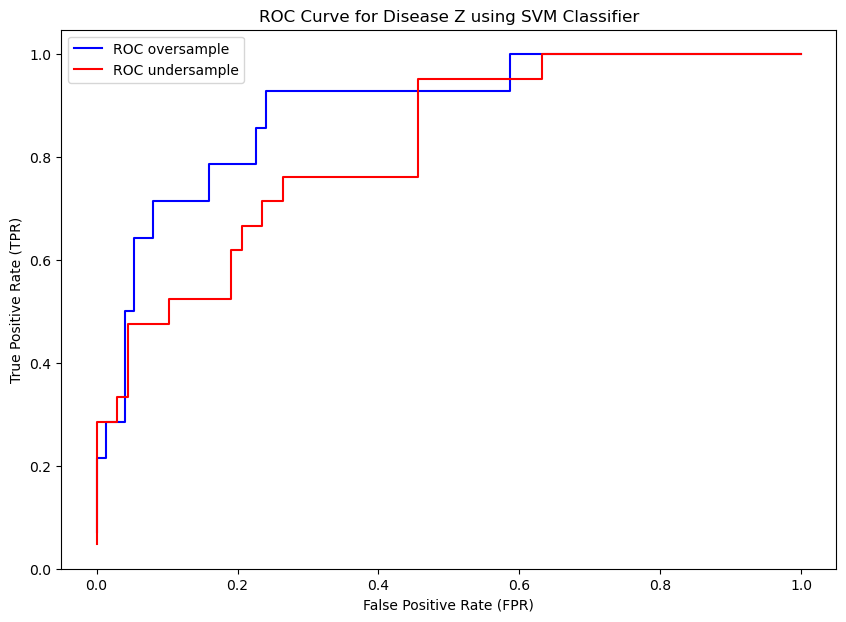

In [81]:
#after oversampling
X_train_oversampled = X_train_oversampled.values if hasattr(X_train_oversampled, 'values') else X_train_oversampled
y_train_oversampled = y_train_oversampled.values if hasattr(y_train_oversampled, 'values') else y_train_oversampled
X_test = X_test.values if hasattr(X_test, 'values') else X_test
y_test = y_test.values if hasattr(y_test, 'values') else y_test

svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(X_train_oversampled, y_train_oversampled)
y_scores = svm_classifier.decision_function(X_test)  

thresholds = sorted(y_scores, reverse=True)
TPRs = []
FPRs = []

for threshold in thresholds:
    y_pred_threshold = (y_scores >= threshold).astype(int)
    TP = np.sum((y_pred_threshold == 1) & (y_test == 1))
    FP = np.sum((y_pred_threshold == 1) & (y_test == 0))
    FN = np.sum((y_pred_threshold == 0) & (y_test == 1))
    TN = np.sum((y_pred_threshold == 0) & (y_test == 0))

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TPRs.append(TPR)
    FPRs.append(FPR)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(FPRs, TPRs, label='ROC oversample', color='blue')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Disease Z using SVM Classifier')
plt.legend()



#undersample

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Create an imbalanced target variable
y_imbalanced = np.where(y > np.percentile(y, 75), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(X_train, y_train)
y_scores = svm_classifier.decision_function(X_test)  

thresholds = sorted(y_scores, reverse=True)
undersample_TPRs = []
undersample_FPRs = []

for threshold in thresholds:
    y_pred_threshold = (y_scores >= threshold).astype(int)
    TP = np.sum((y_pred_threshold == 1) & (y_test == 1))
    FP = np.sum((y_pred_threshold == 1) & (y_test == 0))
    FN = np.sum((y_pred_threshold == 0) & (y_test == 1))
    TN = np.sum((y_pred_threshold == 0) & (y_test == 0))

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    undersample_TPRs.append(TPR)
    undersample_FPRs.append(FPR)

# Plot the ROC curve
plt.plot(undersample_FPRs, undersample_TPRs, label='ROC undersample', color='red')
plt.legend()
plt.show()


**Task 4.3 (6 Points):** Compute the AUC of ROC

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two|-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

Compute the AUC of your SVM model. **Note that you are not allowed to use any library function to compute the AUC. You have to do it from scratch.**

In [51]:
undersample_AUC = 0.0
for i in range(1, len(undersample_FPRs)):
    undersample_AUC += 0.5 * (undersample_FPRs[i] - undersample_FPRs[i-1]) * (undersample_TPRs[i] + undersample_TPRs[i-1])

print("undersample_AUC:", undersample_AUC)


undersample_AUC: 0.8620268620268621
